<a href="https://colab.research.google.com/github/Smehta1234/make_circles/blob/main/make_circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)
print(x.shape)
print(y.shape)

(1000, 2)
(1000,)


In [ ]:
x[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


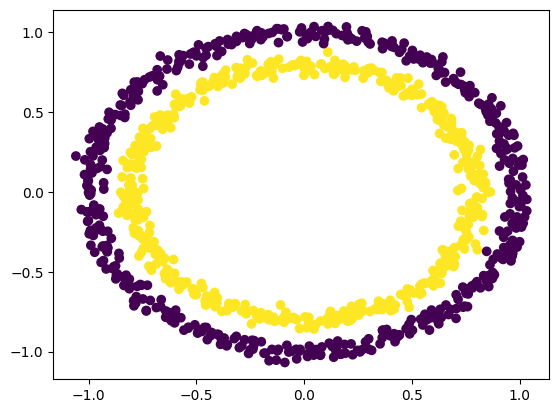

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['x2'], c=df['y'])

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4681 - loss: 4.7601   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4877 - loss: 3.2330 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4822 - loss: 0.7504 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4848 - loss: 0.7095 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4810 - loss: 0.6989


In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(x, y, epochs=100, verbose=0)
model_2.evaluate(x, y)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6933  


[0.6932428479194641, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(x, y, epochs=100, verbose=0)
model_3.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5137 - loss: 0.6911  


[0.694746732711792, 0.4959999918937683]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_boundary(model,x,y):
  x_min,x_max = x[:,0].min()-0.1 , x[:,0].max()+0.1
  y_min,y_max = x[:,1].min()-0.1 , x[:,1].max()+0.1
  xx , yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))

  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
   print('doing multiclass classification')
   y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
   print('doing binary classification')
   y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap='RdYlBu',alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='RdYlBu')
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

In [ ]:
 x_min,x_max = x[:,0].min()-0.1 , x[:,0].max()+0.1
 y_min,y_max = x[:,1].min()-0.1 , x[:,1].max()+0.1
 x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


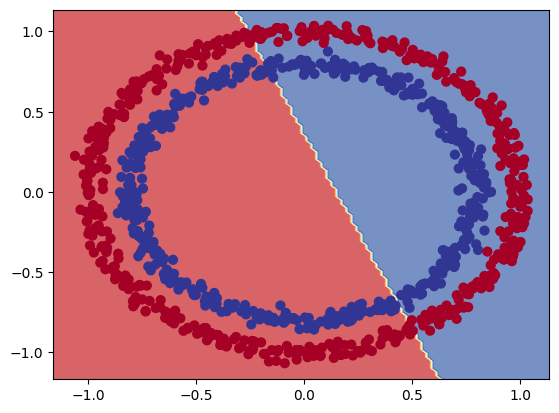

In [ ]:
plot_decision_boundary(model_3,x,y)

In [ ]:
x_min

-1.1595024599098636

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(x, y, epochs=200, verbose=0)


In [ ]:
model_4.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0312  


[0.03150779753923416, 0.9990000128746033]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


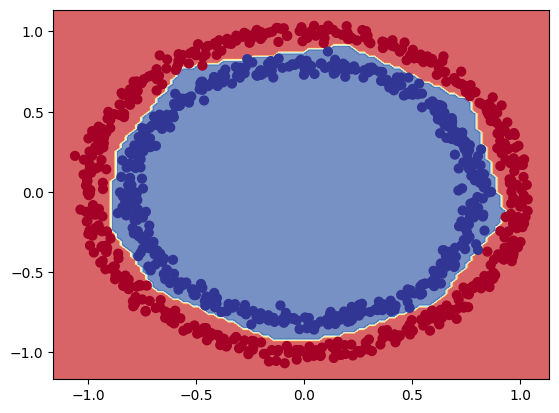

In [ ]:
plot_decision_boundary(model_4,x,y)

In [ ]:
x_train = x[:800]
y_train = y[:800]

x_test = x[800:]
y_test = y[800:]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


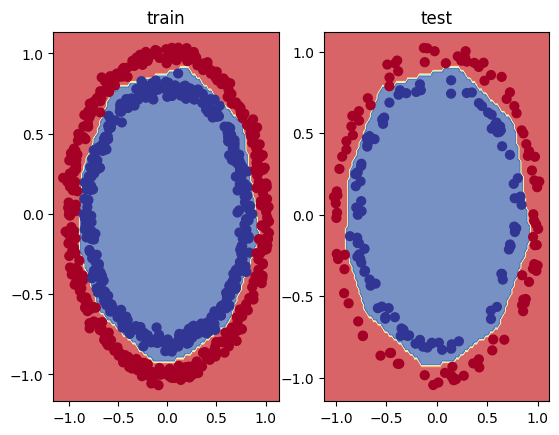

In [ ]:
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,x_test,y_test)

In [ ]:

num_epochs = len(history.history['loss'])
num_epochs

200

In [ ]:
# plot the learning rate vs loss

lrs = 1e-4 * (10 ** (tf.range(num_epochs)/20))
lrs


<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'learning rate vs loss')

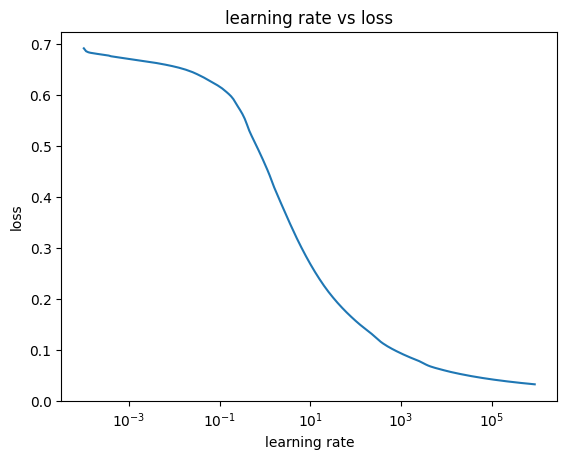

In [ ]:
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

le_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_1 = model_5.fit(x, y, epochs=100, callbacks=[le_scheduler])


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5094 - loss: 0.6923 - learning_rate: 1.0000e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5122 - loss: 0.6921 - learning_rate: 1.1220e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 0.6921 - learning_rate: 1.2589e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5117 - loss: 0.6920 - learning_rate: 1.4125e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5086 - loss: 0.6919 - learning_rate: 1.5849e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5096 - loss: 0.6918 - learning_rate: 1.7783e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5117 - loss: 0.6916 - learning_rate: 1.9953e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 0.6915 - learning_rate: 2.2387e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.6914 - learning_

<Axes: >

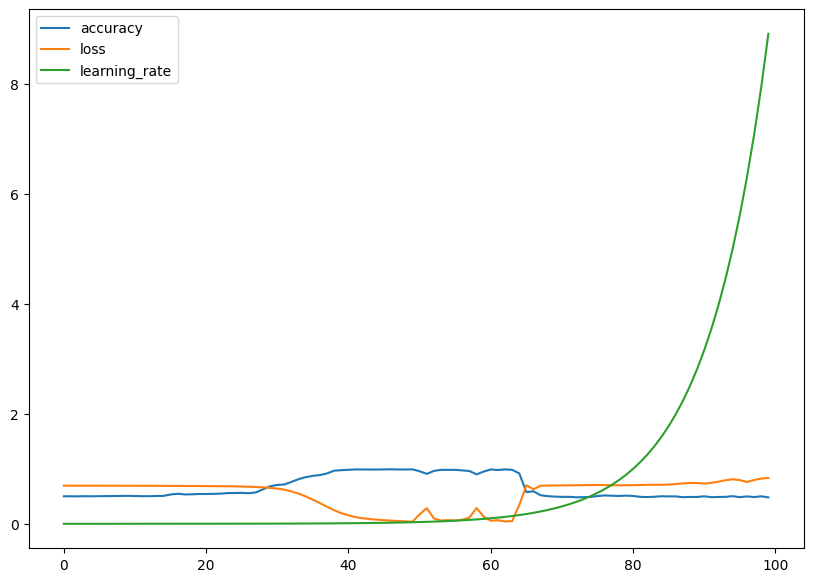

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

Text(0.5, 1.0, 'learning rate vs loss')

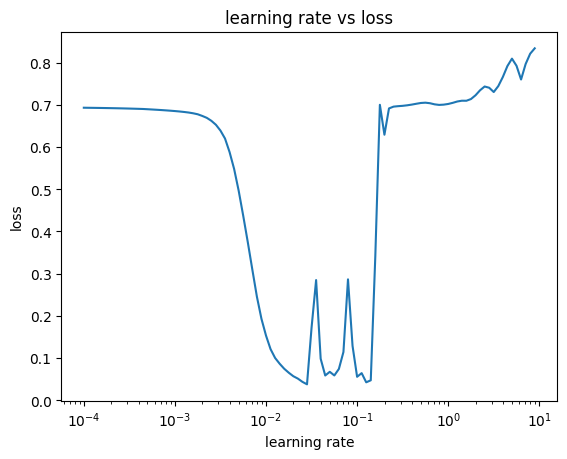

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lrs,history_1.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')


In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])


history_2 = model_5.fit(x, y, epochs=25)


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5050 - loss: 0.7038
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4800 - loss: 0.6939 
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5065 - loss: 0.6889 
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5402 - loss: 0.6814 
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - loss: 0.6777 
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5764 - loss: 0.6569 
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - loss: 0.6115 
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6210 - loss: 0.6137
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7139 - loss: 0.5555
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7510 - loss: 0.5286 
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7484 - loss: 0.5196 
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


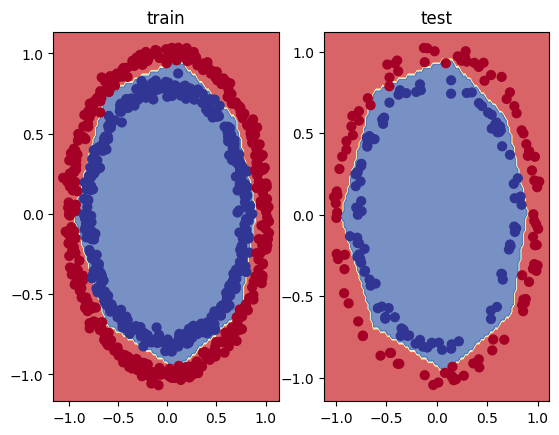

In [ ]:
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_5,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_5,x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_5.predict(x_test)
y_preds = tf.round(y_preds)

cm = confusion_matrix(y_test,y_preds)
cm

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[97,  4],
       [ 0, 99]])

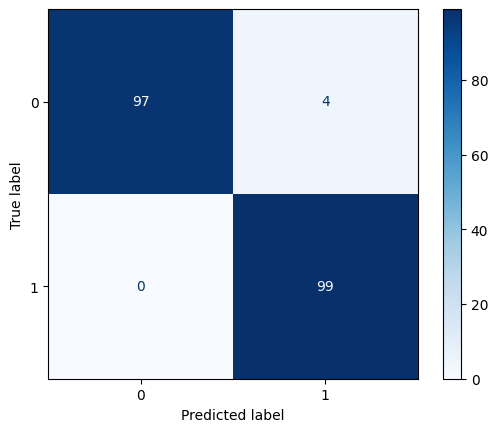

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()